# E10 고양이 수염 스티커 만들기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

## 사진

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

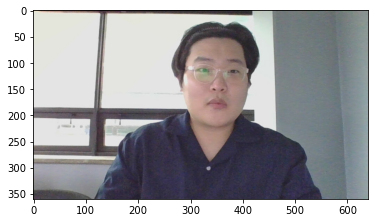

In [3]:
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

rectangles[[(282, 82) (411, 211)]]


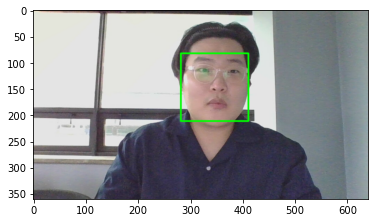

In [6]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


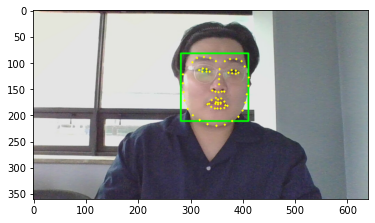

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2 #dlib_rect.width()
    h = (landmark[48][1] - y) #dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(355, 141)
(x,y) : (287,114)
(w,h) : (136,65)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(65, 136, 3)


In [12]:
# refined_x = x - w // 2  # left
# refined_y = y - h       # top
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

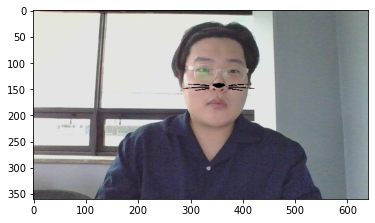

In [13]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 다음 사진

In [14]:
my_image_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.jpg'
my_image_path3 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.jpg'
my_image_path4 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.jpg'
my_image_path5 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image5.jpg'



img_bgr2 = cv2.imread(my_image_path2)
img_bgr3 = cv2.imread(my_image_path3)
img_bgr4 = cv2.imread(my_image_path4)
img_bgr5 = cv2.imread(my_image_path5)


img_bgr2 = cv2.resize(img_bgr2, (640, 360))
img_bgr3 = cv2.resize(img_bgr3, (640, 360))
img_bgr4 = cv2.resize(img_bgr4, (640, 360))
img_bgr5 = cv2.resize(img_bgr5, (640, 360))


img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)
img_rgb5 = cv2.cvtColor(img_bgr5, cv2.COLOR_BGR2RGB)

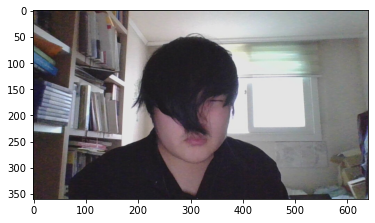

In [15]:
#얼굴 인식 되는지 궁금해서 찍어본 사진, 실패
plt.imshow(img_rgb2)
plt.show()

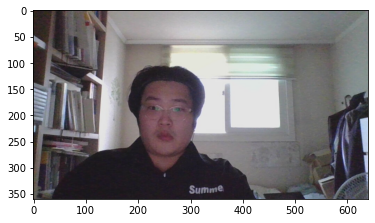

In [16]:
#정면, 성공
plt.imshow(img_rgb3)
plt.show()

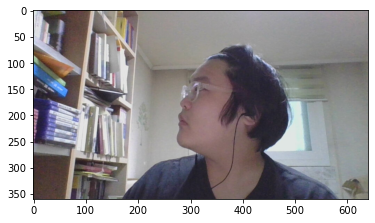

In [17]:
#측면, 실패
plt.imshow(img_rgb4)
plt.show()

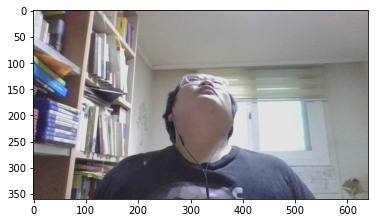

In [18]:
#턱, 실패
plt.imshow(img_rgb5)
plt.show()

In [19]:
dlib_rects2 = detector_hog(img_rgb2, 1)
dlib_rects3 = detector_hog(img_rgb3, 1)

In [20]:
#안됨...
print("2 :", dlib_rects2)
print("3 :", dlib_rects3)

2 : rectangles[]
3 : rectangles[[(199, 163) (306, 271)]]


In [21]:
#계속 치는 것보다 함수 만드는 게 나아 보임

img_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/t1.jpg'

def sticker(img_path, sticker_path):
    my_image_path = img_path
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[2][0]
        y = landmark[36][1]
        w = (landmark[30][0] - x)*2 #dlib_rect.width()
        h = (landmark[48][1] - y) #dlib_rect.width()


    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))

    sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

    img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
        np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

In [22]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
image_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.jpg'
image_path3 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.jpg'
image_path4 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.jpg'
image_path5 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image5.jpg'

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'

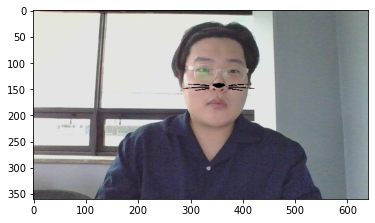

In [23]:
sticker(image_path, sticker_path)

In [24]:
#머리카락 사진, 안됨
sticker(image_path2, sticker_path)

UnboundLocalError: local variable 'l' referenced before assignment

In [ ]:
sticker(image_path3, sticker_path)

In [ ]:
#측면, 안됨
sticker(image_path4, sticker_path)

In [ ]:
#턱, 안됨
sticker(image_path5, sticker_path)

처음 막힌 부분은 아이콘이 흰색 배경이 나와서 같은 조원 현아님께 도움을 요청했다. 0을 255로 바꾸라는 조언을 듣고 문제를 해결하니 lms에서 제공하는 코드 만으로 풀어나갈 수 있어 막힘없이 진행할 수 있었다. 오늘 CS231 딥러닝 풀잎 때 바운딩 박스에 관련된 부분이 나와 관심이 쏠렸고 오늘을 넘기면 또 미루겠구나 싶어서 평소에 잘 안 하던 함수도 이용했다.

## 생각해볼 문제점

* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
 만약 이게 앱이라면, 고객들은 당연히 각도에 따라 스티커의 각도도 변해야 할 것이라고 생각한다. 그러나 현재 그 방식을 적용하지는 못하니 어느 정도 각도의 상태를 구분지어 그 각도에 맞는 스티커를 미리 image로 넣어두고 그것을 매칭하는 방법을 사용하는 건 어떨까? 비효율적이긴 하지만 현재로선 내 최선의 생각이다.

* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
 픽셀 단위로 잡는 것이고 딥러닝에서 배운 것처럼 사람이 인지 못하는 곡선의 형태들로 사람의 얼굴 윤곽을 인식하고 있다. 잘은 모르겠지만 중력이 아래로 향하고 있기 때문에 사람 얼굴의 방향이 왼쪽 혹은 오른쪽으로 기울면 그 방향으로 중력에 따라 얼굴의 형태가 변화해서 컴퓨터가 읽을 수 없는 상태가 되는 것이 아닐까? 

* 실행 속도가 중요할까요?
 앱인 이상 실행 속도는 중요하다. 일상 속에서 가장 많이 소비되는 형태의 앱이기 때문에 지금 시대에서 고객들은 이 정도면 단순한 처리라고 생각한다. 다시 말해 빨리 되는 것이 디폴트 값으로 여겨지고 있다. 쓰고 보니 질문 자체의 범위가 커서 의도와는 다른 방향으로 간 것 같긴 하다.
 
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
 정확도가 떨어져서는 안 되지만, 얼마든지 사용자들은 인식이 안 되면 인식하기 위해서 약간의 오차 정도는 스스로 보완하려고 할 것이다. 내가 이미지를 여러개 찍어서 넣었던 것 처럼. 그것 보다는 속도, 이미지 리사이즈 크기, 매력적인 스티커 이미지의 가짓수가 더 중요하다고 생각된다.